# Analisis Segmentasi Pelanggan untuk Optimalisasi Strategi Pemasaran

# Data Understanding

## Sumber Data

Dataset didapat dari kaggle (https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data)

## Integrasi Data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import MeanShift, AffinityPropagation
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("customer_segmentation.csv")
display(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [83]:
display(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [84]:
data.shape

(2240, 29)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Struktur Dataset

Id: Pengenal unik untuk setiap individu dalam dataset.
Year_Birth: Tahun kelahiran individu.
Education: Tingkat pendidikan tertinggi yang telah dicapai oleh individu.
Marital_Status: Status pernikahan individu.
Income: Pendapatan tahunan individu.
Kidhome: Jumlah anak kecil di dalam rumah tangga.
Teenhome: Jumlah remaja di dalam rumah tangga.
Dt_Customer: Tanggal saat pelanggan pertama kali terdaftar atau menjadi bagian dari database perusahaan.
Recency: Jumlah hari sejak pembelian atau interaksi terakhir.
MntWines: Jumlah yang dihabiskan untuk anggur.
MntFruits: Jumlah yang dihabiskan untuk buah-buahan.
MntMeatProducts: Jumlah yang dihabiskan untuk produk daging.
MntFishProducts: Jumlah yang dihabiskan untuk produk ikan.
MntSweetProducts: Jumlah yang dihabiskan untuk produk manis.
MntGoldProds: Jumlah yang dihabiskan untuk produk emas.
NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon atau sebagai bagian dari penawaran.
NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan.
NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog.
NumStorePurchases: Jumlah pembelian yang dilakukan di toko fisik.
NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam satu bulan.
AcceptedCmp3: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran ketiga.
AcceptedCmp4: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran keempat.
AcceptedCmp5: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran kelima.
AcceptedCmp1: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran pertama.
AcceptedCmp2: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran kedua.
Complain: Indikator biner (1 atau 0) apakah individu pernah membuat keluhan.
Z_CostContact: Biaya tetap yang terkait dengan menghubungi pelanggan.
Z_Revenue: Pendapatan tetap yang terkait dengan respon sukses dari kampanye.
Response: Indikator biner (1 atau 0) apakah individu merespon kampanye pemasaran.a

Label

Dalam unsupervised learning, seperti KMeans, tidak ada label yang didefinisikan sebelumnya. Label biasanya digunakan dalam supervised learning, di mana kita memiliki target atau hasil yang sudah diketahui (seperti "kelas" atau "kategori" yang akan diprediksi).

Namun, setelah menjalankan KMeans, kita menghasilkan label baru, yaitu cluster assignment atau kelompok pelanggan yang terbentuk berdasarkan pola data. Dalam dataset kita, hasil dari segmentasi KMeans ditambahkan sebagai kolom baru yang disebut Cluster. Ini adalah "label" yang dihasilkan setelah algoritma KMeans dijalankan, dan setiap pelanggan diberi label sesuai dengan kelompok (cluster) tempat mereka berada.

In [86]:
data_description = data.describe(include='all')
data_description.T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


ID: Unik untuk setiap pelanggan, rentang dari 1 hingga 11,191.
Year_Birth: Pelanggan lahir antara tahun 1940 hingga 1996, dengan rata-rata tahun kelahiran 1968.
Education: Dikodekan secara numerik, dengan 5 kategori tingkat pendidikan yang terwakili.
Marital_Status: Dikodekan dengan 7 kategori status perkawinan.
Income: Pendapatan bervariasi sangat luas, dari minimal 1.7K hingga maksimum 666K, dengan pendapatan rata-rata sekitar 52,238.
Kidhome & Teenhome: Banyak pelanggan tidak memiliki anak atau remaja di rumah, dengan nilai maksimum masing-masing 2.
Recency: Jumlah hari sejak interaksi terakhir bervariasi dari 0 hingga 99 hari, dengan rata-rata sekitar 49 hari.
MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Nilai total pengeluaran dalam kategori produk tertentu selama dua tahun terakhir. Misalnya, rata-rata pelanggan menghabiskan 303 untuk anggur (MntWines) dan 166 untuk produk daging (MntMeatProducts).
Complain: Pelanggan yang pernah mengeluh hanya 0,94% dari total populasi.
Response: Hanya 35% pelanggan yang merespon kampanye terbaru.

## Visualisasi Data

### Distribusi Education

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\2328056226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education.index, y=education.values, palette='viridis')


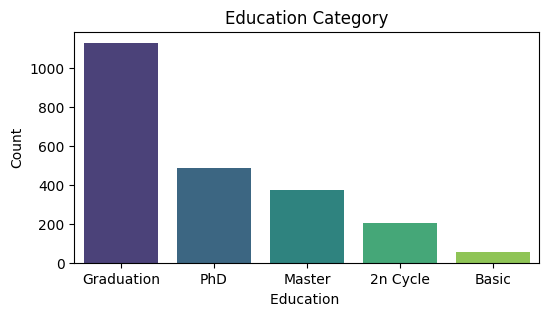

In [87]:
education = data['Education'].value_counts()
print(education)

plt.figure(figsize=(6, 3))
sns.barplot(x=education.index, y=education.values, palette='viridis')
plt.title('Education Category')
plt.xlabel('Education ')
plt.ylabel('Count')
plt.show()

### Distribusi Status Pernikahan

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\1648546556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Marital_Status.index, y=Marital_Status.values, palette='viridis')


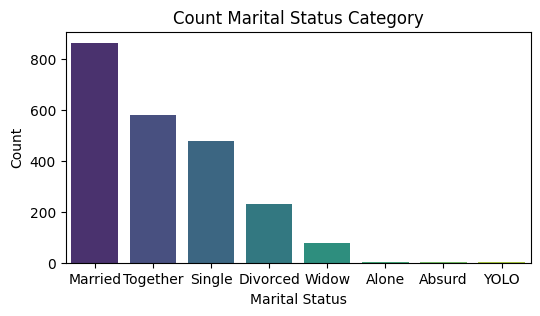

In [88]:
Marital_Status = data['Marital_Status'].value_counts()
print(Marital_Status)

plt.figure(figsize=(6, 3))
sns.barplot(x=Marital_Status.index, y=Marital_Status.values, palette='viridis')
plt.title('Count Marital Status Category')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Distribusi KidHome

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64


C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\3496258722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Kidhome.index, y=Kidhome.values, palette='viridis')


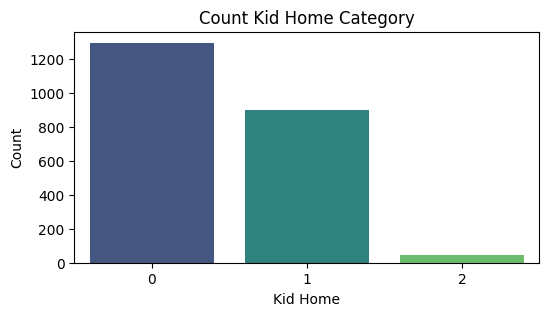

In [89]:
Kidhome = data['Kidhome'].value_counts()
print(Kidhome)

plt.figure(figsize=(6, 3))
sns.barplot(x=Kidhome.index, y=Kidhome.values, palette='viridis')
plt.title('Count Kid Home Category')
plt.xlabel('Kid Home')
plt.ylabel('Count')
plt.show()

### Distribusi TeenHome

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\390776469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Teenhome.index, y=Teenhome.values, palette='viridis')


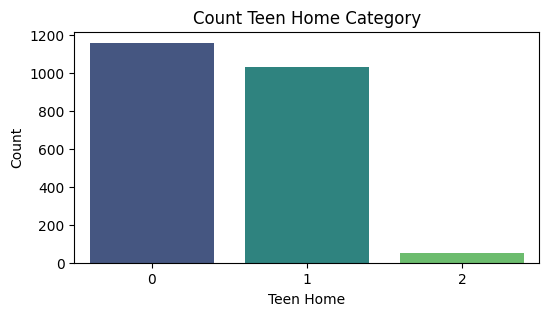

In [90]:
Teenhome = data['Teenhome'].value_counts()
print(Teenhome)

plt.figure(figsize=(6, 3))
sns.barplot(x=Teenhome.index, y=Teenhome.values, palette='viridis')
plt.title('Count Teen Home Category')
plt.xlabel('Teen Home')
plt.ylabel('Count')
plt.show()

# Preprocessing Data

## Pendeteksian Duplikat

In [91]:
duplicates_count = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates_count}")

Jumlah baris duplikat: 0


## Menseleksi kolom yang ingin digunakan

In [92]:
data_cleaned = data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response'], axis=1)

data_cleaned['Age'] = 2023 - data['Year_Birth']
data_cleaned = data_cleaned.drop(columns=['Year_Birth'])

data_cleaned['Spending'] = (data_cleaned['MntWines'] + data_cleaned['MntFruits'] +
                            data_cleaned['MntMeatProducts'] + data_cleaned['MntFishProducts'] +
                            data_cleaned['MntSweetProducts'] + data_cleaned['MntGoldProds'])

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

Membatasi umur hanya sampai kurang dari sama dengan 90

In [93]:
data_cleaned = data_cleaned[data_cleaned['Age'] <= 90]

## Pendeteksian Missing Values

In [94]:
data_cleaned.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Age                     0
Spending                0
dtype: int64

Mengisi Missing Values Menggunakan Metode Rata-Rata

In [95]:
data_cleaned['Income'] = data_cleaned['Income'].fillna(data_cleaned['Income'].mean())

In [96]:
data_cleaned.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Age                    0
Spending               0
dtype: int64

## Mengubah Tipe Data Kategorikal

In [97]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Education', 'Marital_Status'])

In [98]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2237 non-null   float64
 1   Kidhome                  2237 non-null   int64  
 2   Teenhome                 2237 non-null   int64  
 3   Recency                  2237 non-null   int64  
 4   MntWines                 2237 non-null   int64  
 5   MntFruits                2237 non-null   int64  
 6   MntMeatProducts          2237 non-null   int64  
 7   MntFishProducts          2237 non-null   int64  
 8   MntSweetProducts         2237 non-null   int64  
 9   MntGoldProds             2237 non-null   int64  
 10  NumDealsPurchases        2237 non-null   int64  
 11  NumWebPurchases          2237 non-null   int64  
 12  NumCatalogPurchases      2237 non-null   int64  
 13  NumStorePurchases        2237 non-null   int64  
 14  NumWebVisitsMonth        2237

## Normalisasi Data

In [99]:
scaler = MinMaxScaler()
data_cleaned[['Income_normalized', 'Spending_normalized']] = scaler.fit_transform(data_cleaned[['Income', 'Spending']])

joblib.dump(scaler, 'income_scaler.pkl')

['income_scaler.pkl']

In [100]:
print(data_cleaned.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts   
0  58138.0        0         0       58       635         88              546  \
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...   
0              172                88            88  ...  \
1                2                 1             6  ...   
2              111                21            42  ...   
3               10                 3             5  ...   
4               46                27            15  ...   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced   
0                  False                 False                    False  \
1             

# Modelling

## === Clustering berdasarkan Income dan Spending ===

### **=== Menggunakan K-Means ===**

**--- Menentukan Nilai K ---**

1. Metode Elbow

Metode Elbow melibatkan plotting nilai inertia (within-cluster sum of squares) untuk berbagai nilai k dan mencari titik di mana penurunan inertia mulai melambat (membentuk "siku"). Titik ini dianggap sebagai nilai k yang optimal.

iterasi ke-1 => 130.7078795385802
iterasi ke-2 => 30.828773818411413
iterasi ke-3 => 14.602239024371888
iterasi ke-4 => 9.028106680719024
iterasi ke-5 => 6.460141408673964
iterasi ke-6 => 4.935767856651698
iterasi ke-7 => 4.049443139852307
iterasi ke-8 => 3.528041070081546
iterasi ke-9 => 3.0985278338763376
iterasi ke-10 => 2.231737835188948


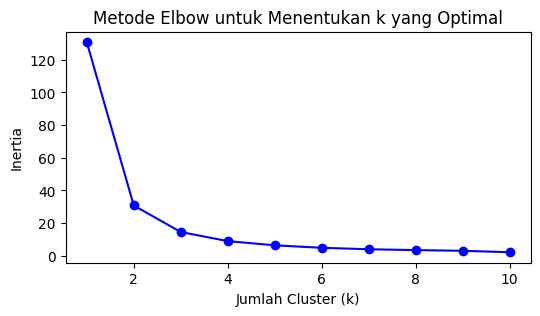

In [101]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init = "k-means++", 
                    max_iter = 300, random_state=42)
    kmeans.fit(data_cleaned[['Income_normalized', 'Spending_normalized']])
    inertia.append(kmeans.inertia_)
    print(f'iterasi ke-{k} => {kmeans.inertia_}')

plt.figure(figsize=(6, 3))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k yang Optimal')
plt.show()

2. Metode Silhouette

Metode Silhouette mengukur seberapa mirip objek dengan cluster mereka sendiri dibandingkan dengan cluster lain. Nilai Silhouette berkisar dari -1 (clustering buruk) hingga 1 (clustering baik). Nilai k yang optimal adalah yang memiliki nilai Silhouette rata-rata tertinggi.

iterasi ke-2 => 0.6844533986377243
iterasi ke-3 => 0.6503978286508862
iterasi ke-4 => 0.6143622563025584
iterasi ke-5 => 0.6020820393903096
iterasi ke-6 => 0.5839834096100835
iterasi ke-7 => 0.5559354241718268
iterasi ke-8 => 0.5292691762819436
iterasi ke-9 => 0.5250697241571309
iterasi ke-10 => 0.5227089193926822


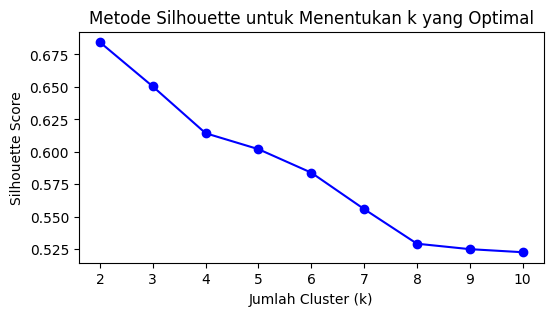

In [102]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++", 
                    max_iter = 300, random_state=42)
    kmeans.fit(data_cleaned[['Income_normalized', 'Spending_normalized']])
    score = silhouette_score(data_cleaned[['Income_normalized', 'Spending_normalized']], kmeans.labels_)
    silhouette_scores.append(score)
    print(f'iterasi ke-{k} => {score}')

plt.figure(figsize=(6, 3))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette untuk Menentukan k yang Optimal')
plt.show()

**--- Model K-Means ---**

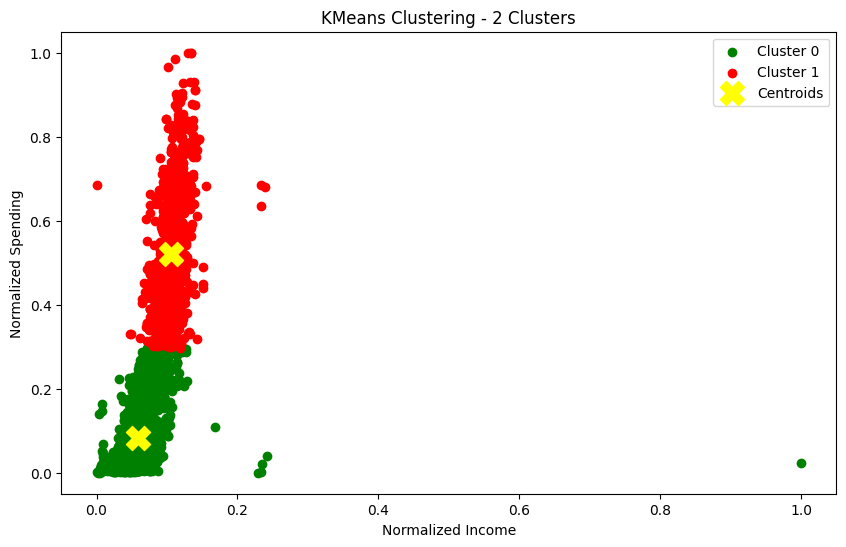

Cluster
0    1433
1     804
Name: count, dtype: int64, Cluster
0    64.059008
1    35.940992
Name: proportion, dtype: float64
Model telah disimpan ke dalam file my_model.pkl


In [103]:
jumlah_cluster = 2

kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned[['Income_normalized', 'Spending_normalized']])

plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'purple', 'pink']
for cluster in range(jumlah_cluster):
    subset = data_cleaned[data_cleaned['Cluster'] == cluster]
    plt.scatter(subset['Income_normalized'], subset['Spending_normalized'], color=colors[cluster], label=f"Cluster {cluster}")

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Normalized Income')
plt.ylabel('Normalized Spending')
plt.title('KMeans Clustering - 2 Clusters')
plt.legend()
plt.show()

print(f"{data_cleaned['Cluster'].value_counts().sort_index(ascending=True)}, {(data_cleaned['Cluster'].value_counts(normalize=True) * 100).sort_index(ascending=True)}")

joblib.dump(kmeans, 'income_model.pkl')
print("Model telah disimpan ke dalam file my_model.pkl")

**--- Kumpulan data cluster ---**

In [104]:
cluster_0 = data_cleaned[data_cleaned['Cluster'] == 0]
cluster_1 = data_cleaned[data_cleaned['Cluster'] == 1]

print("\nCluster 0 Data :\n")
print(cluster_0.head(1))

print("\nCluster 1 Data :\n")
print(cluster_1.head(1))


Cluster 0 Data :

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts   
1  46344.0        1         1       38        11          1                6  \

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Marital_Status_Alone   
1                2                 1             6  ...                 False  \

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single   
1                    False                   False                   True  \

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO   
1                    False                 False                False  \

   Income_normalized  Spending_normalized  Cluster  
1           0.067095              0.00873        0  

[1 rows x 33 columns]

Cluster 1 Data :

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts   
0  58138.0        0         0       58       635         88              546  \

   MntFishProducts  MntSweetProducts  MntGoldP

**--- Silhouette Score ---**

In [105]:
score = silhouette_score(data_cleaned[['Income_normalized', 'Spending_normalized']], data_cleaned['Cluster'])

print(f'Silhouette Score: {score}')

Silhouette Score: 0.6844533986377243


**--- Testing ---**

In [106]:
new_data = {'Income': 46344, 'Spending': 27}

new_data_df = pd.DataFrame([new_data])

new_data_normalized = scaler.transform(new_data_df)
print(new_data_normalized)

predicted_cluster = kmeans.predict(new_data_normalized)

print(f'Customer masuk cluster ke-{predicted_cluster[0]}')

[[0.06709518 0.00873016]]
Customer masuk cluster ke-0


c:\Users\BAGUS\PYTHON\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**--- Deploy ---**

In [157]:
# pip install modelbit

In [ ]:
import modelbit

mb = modelbit.login()

In [ ]:
def predict_cluster(income, spending):
    """
    Test the clustering model with a new data point based on income and spending.

    Parameters:
    income (float): The income value of the new data point.
    spending (float): The spending value of the new data point.

    Returns:
    dict: A dictionary containing the income, spending, and predicted cluster.
    """
    new_data = {'Income': income, 'Spending': spending}
    new_data_df = pd.DataFrame([new_data])
    
    new_data_normalized = scaler.transform(new_data_df)
    
    predicted_cluster = kmeans.predict(new_data_normalized)
    
    return {
        'income': income,
        'spending': spending,
        'cluster': int(predicted_cluster[0])
    }

result = test_clustering(50000, 1500)
print(result)

# mb.deploy(predict_cluster)

Warning, skipping module 'c:\Users\BAGUS\PYTHON\Lib\site-packages\vboxapi-1.0-py3.11.egg/EGG-INFO': [WinError 3] The system cannot find the path specified: 'c:\\Users\\BAGUS\\PYTHON\\Lib\\site-packages\\vboxapi-1.0-py3.11.egg/EGG-INFO'


Warning, skipping module 'c:\Users\BAGUS\PYTHON\Lib\site-packages\vboxapi-1.0-py3.11.egg/EGG-INFO': [WinError 3] The system cannot find the path specified: 'c:\\Users\\BAGUS\\PYTHON\\Lib\\site-packages\\vboxapi-1.0-py3.11.egg/EGG-INFO'


### **=== Menggunakan DBSCAN ===**

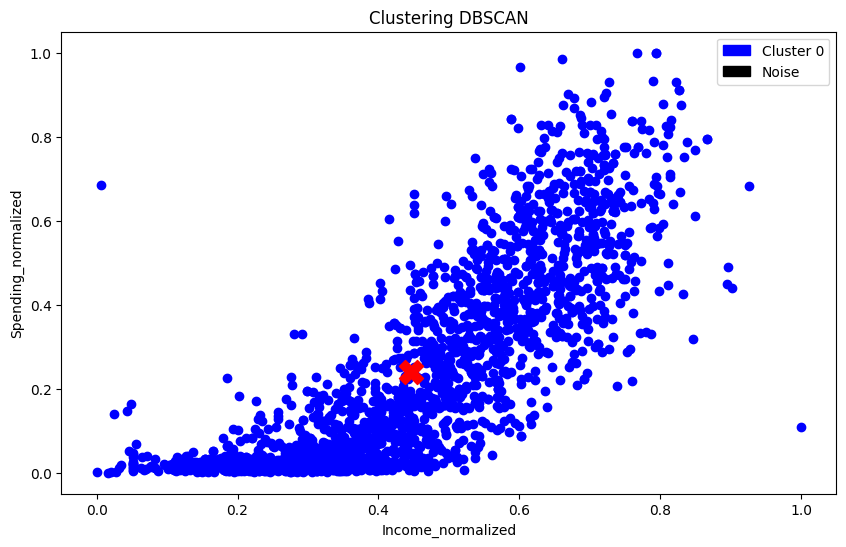

Cluster
0    2229
Name: count, dtype: int64, Cluster
0    100.0
Name: proportion, dtype: float64


In [151]:
data_cleaned2 = data_cleaned.copy()
data_cleaned2 = data_cleaned2[data_cleaned2['Income'] <= 120000]

data_cleaned2[['Income_normalized', 'Spending_normalized']] = scaler.fit_transform(data_cleaned2[['Income', 'Spending']])

dbscan_model = DBSCAN(eps=800, min_samples=5)
data_cleaned2['Cluster'] = dbscan_model.fit_predict(data_cleaned2[['Income_normalized', 'Spending_normalized']])

colors = ['blue', 'red']
data_cleaned2['Colour'] = data_cleaned2['Cluster'].map(lambda x: colors[x] if x != -1 else 'black')

plt.figure(figsize=(10, 6))
for cluster in np.unique(data_cleaned2['Cluster']):
    subset = data_cleaned2[data_cleaned2['Cluster'] == cluster]
    plt.scatter(subset['Income_normalized'], subset['Spending_normalized'], color=(colors[cluster] if cluster != -1 else 'black'), label=f"Cluster {cluster}" if cluster != -1 else "Noise")

centroids = data_cleaned2.groupby('Cluster')[['Income_normalized', 'Spending_normalized']].mean()
plt.scatter(centroids['Income_normalized'], centroids['Spending_normalized'], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Income_normalized')
plt.ylabel('Spending_normalized')
plt.title('Clustering DBSCAN')

handles = [mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in range(len(colors)-1)]
handles.append(mpatches.Patch(color='black', label='Noise'))
plt.legend(handles=handles)
plt.show()

print(f"{data_cleaned2['Cluster'].value_counts().sort_index(ascending=True)}, {(data_cleaned2['Cluster'].value_counts(normalize=True) * 100).sort_index(ascending=True)}")


In [144]:
data_no_noise = data_cleaned2[data_cleaned2['Cluster'] != -1]

if len(np.unique(data_no_noise['Cluster'])) > 1:
    score = silhouette_score(data_no_noise[['Income_normalized', 'Spending_normalized']], data_no_noise['Cluster'])
    print(f"Silhouette Score: {score}")
else:
    print("Tidak dapat menghitung Silhouette Score, hanya ada satu cluster yang valid.")


Tidak dapat menghitung Silhouette Score, hanya ada satu cluster yang valid.


### **=== Menggunakan MEAN-SHIFT ===**

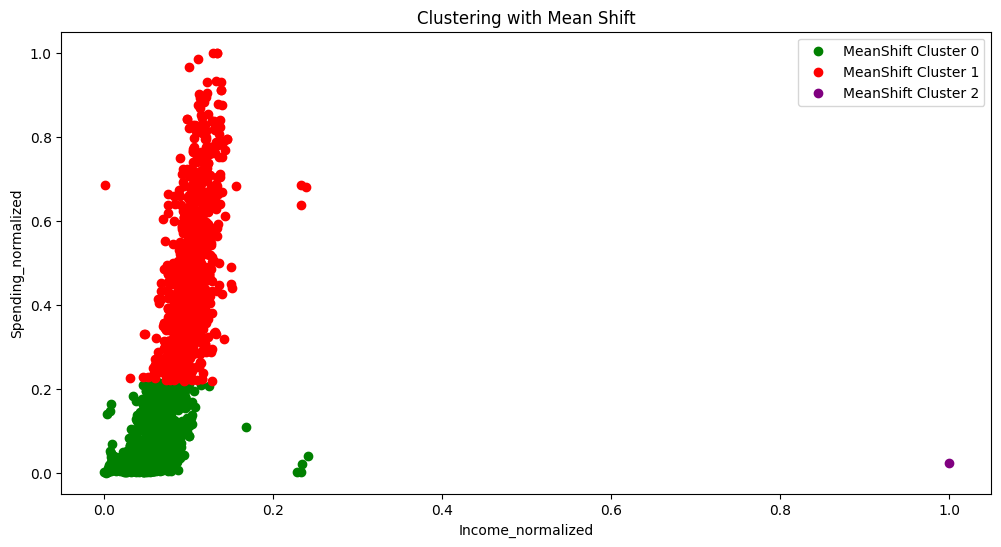

Mean Shift Cluster Jumlah:
MeanShift_Cluster
0    1279
1     957
2       1
Name: count, dtype: int64

Mean Shift Cluster Persentase:
MeanShift_Cluster
0    57.174788
1    42.780510
2     0.044703
Name: proportion, dtype: float64

Silhouette Score untuk Mean Shift Clustering: 0.6654


In [154]:
data_cleaned3 = data_cleaned.copy()

mean_shift_model = MeanShift()
mean_shift_model.fit(data_cleaned3[['Income_normalized', 'Spending_normalized']])
data_cleaned3['MeanShift_Cluster'] = mean_shift_model.labels_

plt.figure(figsize=(12, 6))
colors = ['green', 'red', 'purple', 'blue', 'orange']
for cluster in np.unique(data_cleaned3['MeanShift_Cluster']):
    subset = data_cleaned3[data_cleaned3['MeanShift_Cluster'] == cluster]
    plt.scatter(subset['Income_normalized'], subset['Spending_normalized'], color=colors[cluster % len(colors)], label=f'MeanShift Cluster {cluster}')

plt.xlabel('Income_normalized')
plt.ylabel('Spending_normalized')
plt.title('Clustering with Mean Shift')
plt.legend()
plt.show()

print(f"Mean Shift Cluster Jumlah:\n{data_cleaned3['MeanShift_Cluster'].value_counts()}\n")
print(f"Mean Shift Cluster Persentase:\n{(data_cleaned3['MeanShift_Cluster'].value_counts(normalize=True) * 100).sort_index(ascending=True)}\n")

silhouette_avg = silhouette_score(data_cleaned3[['Income_normalized', 'Spending_normalized']], data_cleaned3['MeanShift_Cluster'])
print(f'Silhouette Score untuk Mean Shift Clustering: {silhouette_avg:.4f}')


## === Clustering berdasarkan Umur Pembeli dan Pemasukan ===

### K Means

C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\808284384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['Cluster'] = model2.labels_ #tambahkan cluster
C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\808284384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['Colour'] = data_model2['Cluster'].map({0: colors[0], 1: colors[1], 2: colors[2]})


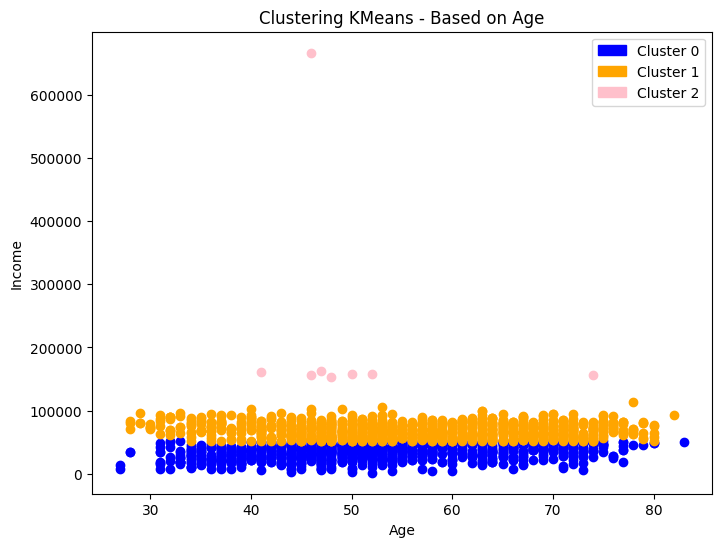

Cluster
1    1117
0    1112
2       8
Name: count, dtype: int64
Silhouette Score: 0.6008804923921306


In [ ]:
# MODEL 2
data_model2 = data_cleaned[['Age','Income']]

model2 = KMeans(n_clusters=3, random_state=42)
model2.fit(data_model2)

data_model2['Cluster'] = model2.labels_ #tambahkan cluster

colors = ['blue', 'orange', 'pink'] #kasih warna pada bar
data_model2['Colour'] = data_model2['Cluster'].map({0: colors[0], 1: colors[1], 2: colors[2]})

plt.figure(figsize=(8, 6))
for cluster in range(3):
    subset = data_model2[data_model2['Cluster'] == cluster]
    plt.scatter(subset['Age'], subset['Income'], color=colors[cluster], label=f"Cluster {cluster}")

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering KMeans - Based on Age')

# Menambahkan legenda
handles = [mpatches.Patch(color=colors[0], label='Cluster 0'),
           mpatches.Patch(color=colors[1], label='Cluster 1'),
           mpatches.Patch(color=colors[2], label='Cluster 2')]
plt.legend(handles=handles)

plt.show()
print(data_model2['Cluster'].value_counts())
silhouette_avg = silhouette_score(data_model2[['Age', 'Income']], data_model2['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


In [ ]:
display(data_model2)

,Age,Income,Cluster,Colour
0,66,58138.0,1,orange
1,69,46344.0,0,blue
2,58,71613.0,1,orange
3,39,26646.0,0,blue
4,42,58293.0,1,orange
...,...,...,...,...
2235,56,61223.0,1,orange
2236,77,64014.0,1,orange
2237,42,56981.0,1,orange
2238,67,69245.0,1,orange


## Clustering Customer Lifetime Value (CLV) 

### Mean Shift

C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\1129295071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model3['Outcome'] = (data_cleaned['MntWines'] + data_cleaned['MntFruits'] +
C:\Users\BAGUS\AppData\Local\Temp\ipykernel_13436\1129295071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model3['MeanShift_Cluster'] = mean_shift_model.labels_


Mean Shift Cluster Counts:
MeanShift_Cluster
1    1141
0    1087
2       8
3       1
Name: count, dtype: int64

Mean Shift Cluster Percentage:
MeanShift_Cluster
0    48.591864
1    51.005811
2     0.357622
3     0.044703
Name: proportion, dtype: float64

Silhouette Score untuk Mean Shift Clustering: 0.6020


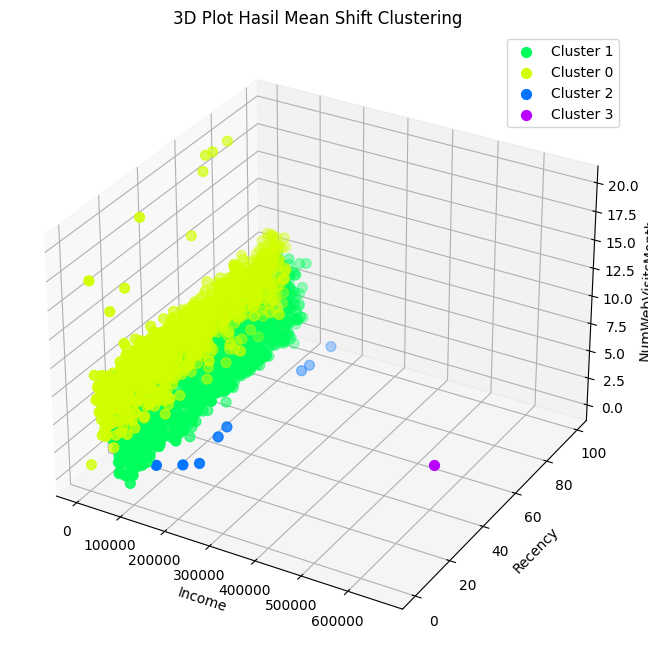

Silhouette Score untuk Mean Shift Clustering: 0.6020


In [ ]:
# MODEL 3
data_model3 = data_cleaned[['Income', 'Recency', 'NumWebVisitsMonth']]
data_model3['Outcome'] = (data_cleaned['MntWines'] + data_cleaned['MntFruits'] + 
                          data_cleaned['MntMeatProducts'] + data_cleaned['MntFishProducts'] + 
                          data_cleaned['MntSweetProducts'] + data_cleaned['MntGoldProds'])

# Clustering dengan Mean Shift
mean_shift_model = MeanShift()
mean_shift_model.fit(data_model3[['Income', 'Recency', 'NumWebVisitsMonth', 'Outcome']])
data_model3['MeanShift_Cluster'] = mean_shift_model.labels_

# Menampilkan hasil cluster Mean Shift
print(f"Mean Shift Cluster Counts:\n{data_model3['MeanShift_Cluster'].value_counts()}\n")
print(f"Mean Shift Cluster Percentage:\n{(data_model3['MeanShift_Cluster'].value_counts(normalize=True) * 100).sort_index(ascending=True)}\n")

silhouette_avg = silhouette_score(data_model3[['Income','Recency','NumWebVisitsMonth','Outcome']], data_model3['MeanShift_Cluster'])
print(f'Silhouette Score untuk Mean Shift Clustering: {silhouette_avg:.4f}')

# Visualisasi 3D hasil clustering Mean Shift
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap cluster
colors = sns.color_palette("hsv", len(data_model3['MeanShift_Cluster'].unique()))

# Scatter plot untuk tiap cluster
for cluster_label in data_model3['MeanShift_Cluster'].unique():
    cluster_data = data_model3[data_model3['MeanShift_Cluster'] == cluster_label]
    ax.scatter(cluster_data['Income'], cluster_data['Recency'], cluster_data['NumWebVisitsMonth'],
               label=f'Cluster {cluster_label}', s=50, color=colors[cluster_label])

# Label axis dan judul
ax.set_xlabel('Income')
ax.set_ylabel('Recency')
ax.set_zlabel('NumWebVisitsMonth')
ax.set_title('3D Plot Hasil Mean Shift Clustering')
ax.legend()

plt.show()
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_model3[['Income','Recency','NumWebVisitsMonth','Outcome']], data_model3['MeanShift_Cluster'])
print(f'Silhouette Score untuk Mean Shift Clustering: {silhouette_avg:.4f}')


## Clustering berdasar pembelian whine dan tahun lahir

### K Means

In [ ]:
df_filtered = data_cleaned[data_cleaned['Year_Birth'] >= 1940]

X = df_filtered[['Year_Birth', 'MntWines']].values

KeyError: 'Year_Birth'

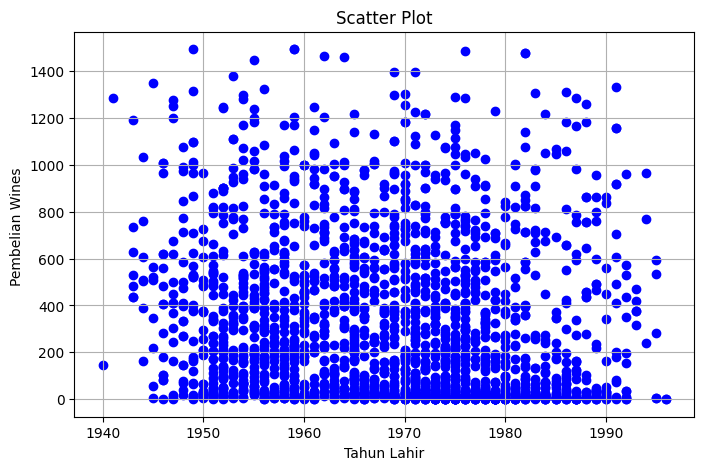

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], color='blue', marker='o')
plt.title('Scatter Plot')
plt.xlabel('Tahun Lahir')
plt.ylabel('Pembelian Wines ')
plt.grid(True)
plt.show()

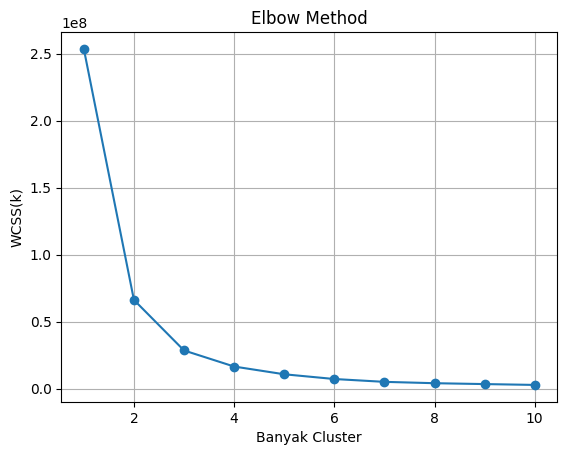

In [ ]:
from sklearn.cluster import KMeans

wcss = []
n_clu = 10

for i in range(1, n_clu+1):
    kmeans = KMeans(n_clusters = i, 
                    init = "k-means++", 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 42)
    kmeans.fit(X) 
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Banyak Cluster")
plt.ylabel("WCSS(k)")
plt.grid(True)
plt.show()

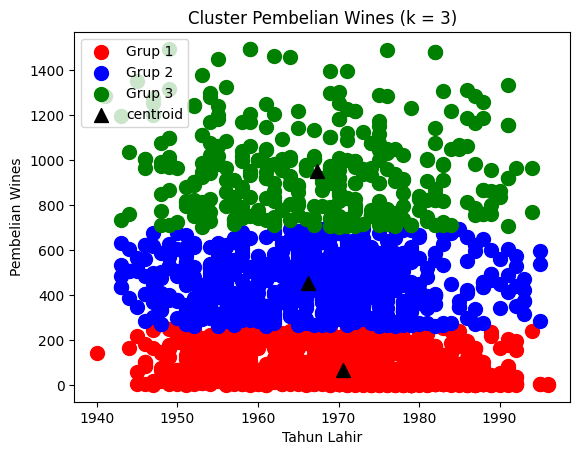

In [ ]:
kmeans = KMeans(n_clusters=3, 
                init="k-means++", 
                max_iter=300, 
                n_init=10, 
                random_state=42)
           
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
              s = 100, c = "red", label = "Grup 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
              s = 100, c = "blue", label = "Grup 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
              s = 100, c = "green", label = "Grup 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
              s = 100, c = "black", label = "centroid", marker = '^')

plt.title('Cluster Pembelian Wines (k = ' + str(3) +')')
plt.xlabel('Tahun Lahir')
plt.ylabel('Pembelian Wines')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.662


### Mean Shift

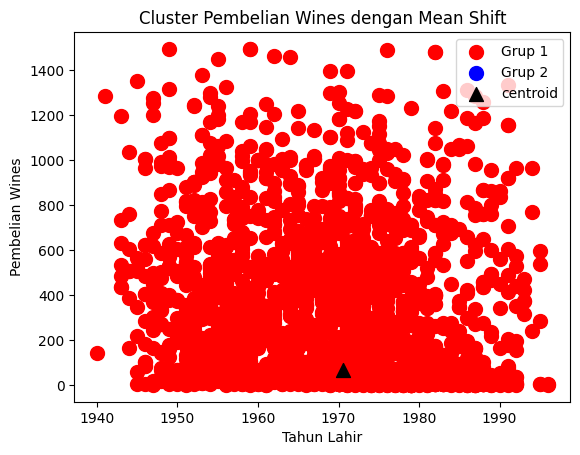

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Clustering menggunakan Mean Shift
mean_shift = MeanShift()
y_meanshift = mean_shift.fit_predict(X)

# Plotting cluster berdasarkan hasil Mean Shift
plt.scatter(X[y_meanshift == 0, 0], X[y_meanshift == 0, 1], 
              s = 100, c = "red", label = "Grup 1")
plt.scatter(X[y_meanshift == 1, 0], X[y_meanshift == 1, 1], 
              s = 100, c = "blue", label = "Grup 2")

# Cek apakah ada lebih dari 2 grup
if len(np.unique(y_meanshift)) > 2:
    plt.scatter(X[y_meanshift == 2, 0], X[y_meanshift == 2, 1], 
                s = 100, c = "green", label = "Grup 3")

# Menampilkan centroids dari Mean Shift
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], 
            s = 100, c = "black", label = "centroid", marker = '^')

plt.title('Cluster Pembelian Wines dengan Mean Shift')
plt.xlabel('Tahun Lahir')
plt.ylabel('Pembelian Wines')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Lakukan clustering dua kali dengan random_state berbeda
kmeans_1 = KMeans(n_clusters=3, random_state=42)
kmeans_2 = KMeans(n_clusters=3, random_state=99)

# Prediksi cluster
y_kmeans_1 = kmeans_1.fit_predict(X)
y_kmeans_2 = kmeans_2.fit_predict(X)

# Evaluasi kesamaan antara kedua hasil cluster
stability_score = adjusted_rand_score(y_kmeans_1, y_kmeans_2)
print(f"Adjusted Rand Index (Stability Score): {stability_score:.3f}")

Adjusted Rand Index (Stability Score): 1.000


Metode lain.

In [ ]:
from datetime import datetime

data['Age'] = datetime.now().year - data['Year_Birth']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['MntWines', 'Age']])


In [ ]:
Q1 = data['MntWines'].quantile(0.25)
Q3 = data['MntWines'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['MntWines'] >= Q1 - 1.5 * IQR) & (data['MntWines'] <= Q3 + 1.5 * IQR)]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    scores.append(silhouette_score(data_scaled, kmeans.labels_))

optimal_k = scores.index(max(scores)) + 2
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 2


In [ ]:
def age_category(age):
    if age < 25:
        return 'Youth'
    elif age < 40:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['Age_Category'] = data['Age'].apply(age_category)


In [ ]:
import matplotlib.pyplot as plt

data['Cluster'] = kmeans.labels_
plt.scatter(data['Age'], data['MntWines'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('MntWines')
plt.title('Clustering Based on Age and Wine Purchases')
plt.show()


ValueError: Length of values (2240) does not match length of index (2205)